In [1]:
import matplotlib.pyplot as plt
import mlrose_hiive
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.metrics import accuracy_score
from sklearn.model_selection import (GridSearchCV, train_test_split, validation_curve)   
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
np.random.seed(42)

## Four Peaks

In [2]:
print("Running Experiments for Four Peaks Problem")
print()
np.random.seed(0)
# Define Fitness function and discrete problem object
fitness = mlrose_hiive.FourPeaks()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

max_attempts = 100
max_iters = 100

# RHC
print("Running Random Hill Climb Experiment")
start_time = time.time()
rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                                                     max_attempts = max_attempts, 
                                                                                     max_iters=max_iters, 
                                                                                     curve=True, 
                                                                                     random_state=42,
                                                                                    restarts=100)
end_time = time.time()
rhc_time = end_time - start_time
print("Time (s): {}".format(rhc_time))
print()

# SA
print("Running Simulated Annealing Experiment")
start_time = time.time()
sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    schedule=mlrose_hiive.GeomDecay(init_temp = 32, decay=0.2, min_temp=1))
end_time = time.time()
sa_time = end_time - start_time
print("Time (s): {}".format(sa_time))
print()

# GA
print("Running Genetic Algorithm Experiment")
start_time = time.time()
ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    pop_size=100,
                                                    mutation_prob=0.2)
end_time = time.time()
ga_time = end_time - start_time
print("Time (s): {}".format(ga_time))
print()

# MIMIC
print("Running MIMIC Algorithm Experiment")
start_time = time.time()
mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                            problem, 
                                                            max_attempts = 100, 
                                                            max_iters = 100,  
                                                            curve = True, 
                                                            random_state = 42,
                                                            keep_pct=0.25)
end_time = time.time()
mimic_time = end_time - start_time
print("Time (s): {}".format(mimic_time))
print()




Running Experiments for Four Peaks Problem

Running Random Hill Climb Experiment
Time (s): 0.31980061531066895

Running Simulated Annealing Experiment
Time (s): 0.016511201858520508

Running Genetic Algorithm Experiment
Time (s): 1.675243854522705

Running MIMIC Algorithm Experiment
Time (s): 1193.1999728679657



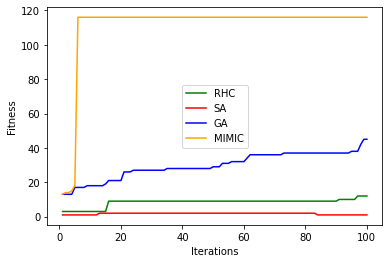

In [3]:
# Plot Iterations vs Fitness
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_fitness_curve[:, 0], label='RHC', color='green')
plt.plot(iterations, sa_fitness_curve[:, 0], label='SA', color='red')
plt.plot(iterations, ga_fitness_curve[:, 0], label='GA', color='blue')
plt.plot(iterations, mimic_fitness_curve[:, 0], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")

# Plot Time Table
data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 



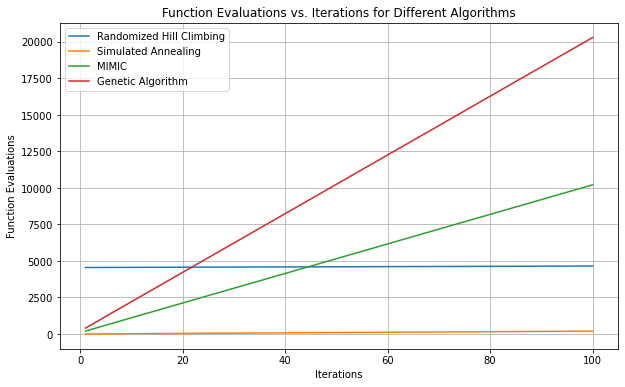

In [4]:
# initialize variables for fevals
function_evals_rhc = []
function_evals_sa = []
function_evals_mimic = []
function_evals_ga = []

# store fevals
function_evals_rhc = rhc_fitness_curve[:, 1]
function_evals_sa = sa_fitness_curve[:, 1]
function_evals_mimic = ga_fitness_curve[:, 1]
function_evals_ga = mimic_fitness_curve[:, 1]

# plot fevals vs iterations
iterations = np.arange(1, max_iters + 1)
plt.figure(figsize=(10,6))
plt.plot(iterations, function_evals_rhc, label='Randomized Hill Climbing')
plt.plot(iterations, function_evals_sa, label='Simulated Annealing')
plt.plot(iterations, function_evals_mimic, label='MIMIC')
plt.plot(iterations, function_evals_ga, label='Genetic Algorithm')

plt.xlabel('Iterations')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations vs. Iterations for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Plot Time Table
data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

time_FourPeaks = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
time_FourPeaks

,Algorithm,Time (s)
0,RHC,0.31980
1,SA,0.01651
2,GA,1.67524
3,MIMIC,1193.19997


Running experiments for problem size: 10
Running experiments for problem size: 50
Running experiments for problem size: 100


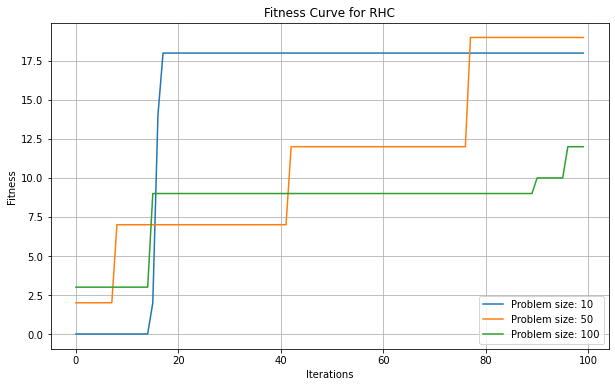

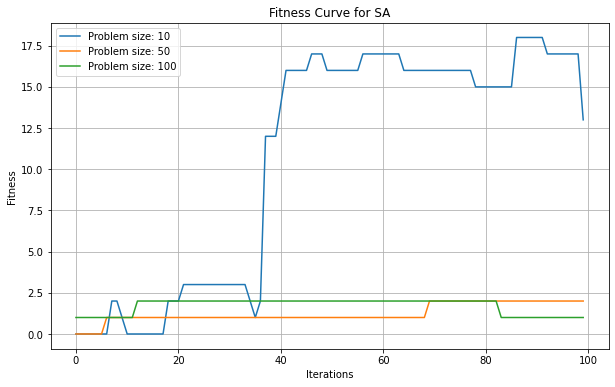

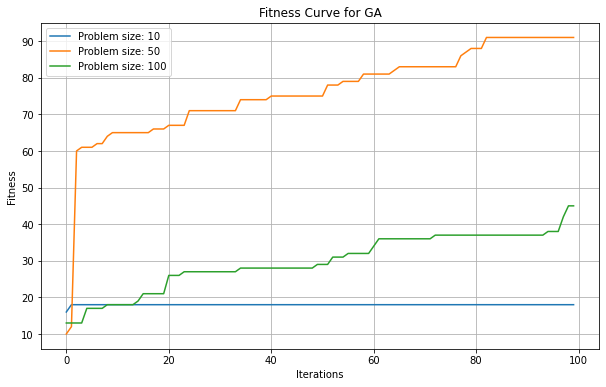

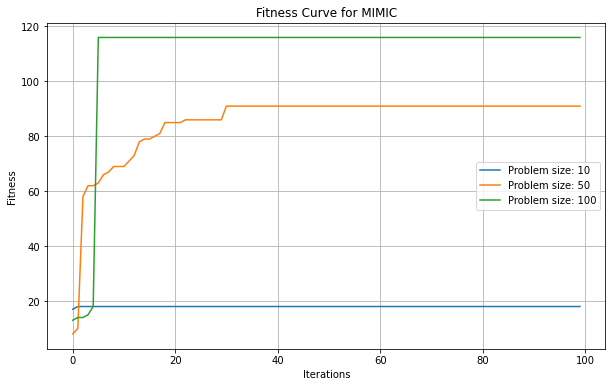

In [6]:

np.random.seed(0)

# Define a range of problem sizes (lengths)
problem_sizes = [10, 50, 100]

# Lists to store fitness curves for each algorithm and problem size
fitness_curves = {
    'rhc': [],
    'sa': [],
    'ga': [],
    'mimic': []
}

function_calls = {
    'rhc': [],
    'sa': [],
    'ga': [],
    'mimic': []
}

# Run experiments for each problem size
for length in problem_sizes:
    print("Running experiments for problem size: {}".format(length))
    
    # Define Fitness function and discrete problem object for the current problem size
    fitness = mlrose_hiive.FourPeaks()
    problem = mlrose_hiive.DiscreteOpt(length=length, fitness_fn=fitness, maximize=True)

    # RHC
    rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                       max_attempts=max_attempts, 
                                                       max_iters=max_iters, 
                                                       curve=True, 
                                                       random_state=42,
                                                       restarts=100)[2]
    fitness_curves['rhc'].append(rhc_fitness_curve)
    function_calls['rhc'].append(len(rhc_fitness_curve))


    # SA
    sa_fitness_curve = mlrose_hiive.simulated_annealing(problem, 
                                                       max_attempts=max_attempts, 
                                                       max_iters=max_iters, 
                                                       curve=True, 
                                                       random_state=42,
                                                       schedule=mlrose_hiive.GeomDecay(init_temp=32, decay=0.2, min_temp=1))[2]
    fitness_curves['sa'].append(sa_fitness_curve)
    function_calls['sa'].append(len(sa_fitness_curve))

    # GA
    ga_fitness_curve = mlrose_hiive.genetic_alg(problem, 
                                                max_attempts=max_attempts, 
                                                max_iters=max_iters, 
                                                curve=True, 
                                                random_state=42,
                                                pop_size=100,
                                                mutation_prob=0.2)[2]
    fitness_curves['ga'].append(ga_fitness_curve)
    function_calls['ga'].append(len(ga_fitness_curve))

    # MIMIC
    mimic_fitness_curve = mlrose_hiive.mimic(problem, 
                                             max_attempts=100, 
                                             max_iters=100,  
                                             curve=True, 
                                             random_state=42,
                                             keep_pct=0.25)[2]
    fitness_curves['mimic'].append(mimic_fitness_curve)
    function_calls['mimic'].append(len(mimic_fitness_curve))

# Plot fitness curves for each algorithm and problem size
for algo, curves in fitness_curves.items():
    plt.figure(figsize=(10, 6))
    for i, curve in enumerate(curves):
        plt.plot(curve[:,0], label=f'Problem size: {problem_sizes[i]}')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title(f'Fitness Curve for {algo.upper()}')
    plt.legend()
    plt.grid(True)
    plt.show()

 

## Continuous Peaks

In [7]:
print("Running Experiments for Continuous Peaks Problem")
print()
np.random.seed(0)

# Define Fitness function and discrete problem object
fitness = mlrose_hiive.ContinuousPeaks()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

max_attempts = 100
max_iters = 100

# RHC
print("Running Random Hill Climb Experiment")
start_time = time.time()
rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                                                     max_attempts = max_attempts, 
                                                                                     max_iters=max_iters, 
                                                                                     curve=True, 
                                                                                     random_state=42,
                                                                                    restarts=75)
end_time = time.time()
rhc_time = end_time - start_time
print("Time (s): {}".format(rhc_time))
print()

# SA
print("Running Simulated Annealing Experiment")
start_time = time.time()
sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    schedule=mlrose_hiive.GeomDecay(init_temp = 8, decay=0.8, min_temp=0.1))
end_time = time.time()
sa_time = end_time - start_time
print("Time (s): {}".format(sa_time))
print()

# GA
print("Running Genetic Algorithm Experiment")
start_time = time.time()
ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    pop_size=200,
                                                    mutation_prob=0.2)
end_time = time.time()
ga_time = end_time - start_time
print("Time (s): {}".format(ga_time))
print()

# MIMIC
print("Running MIMIC Algorithm Experiment")
start_time = time.time()
mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                            problem, 
                                                            max_attempts = 100, 
                                                            max_iters = 100,  
                                                            curve = True, 
                                                            random_state = 42,
                                                            keep_pct=0.75)
end_time = time.time()
mimic_time = end_time - start_time
print("Time (s): {}".format(mimic_time))
print()



Running Experiments for Continuous Peaks Problem

Running Random Hill Climb Experiment
Time (s): 1.2644002437591553

Running Simulated Annealing Experiment
Time (s): 0.02426934242248535

Running Genetic Algorithm Experiment
Time (s): 6.511385679244995

Running MIMIC Algorithm Experiment
Time (s): 2107.209489583969



Text(0, 0.5, 'Fitness')

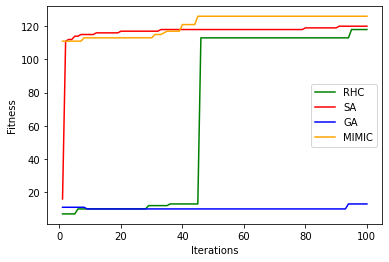

In [8]:
# Plot Iterations vs Fitness
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_fitness_curve[:, 0], label='RHC', color='green')
plt.plot(iterations, ga_fitness_curve[:, 0], label='SA', color='red')
plt.plot(iterations, sa_fitness_curve[:, 0], label='GA', color='blue')
plt.plot(iterations, mimic_fitness_curve[:, 0], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")


In [9]:
# Plot Time Table
data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

time_ContPeaks = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
time_ContPeaks

,Algorithm,Time (s)
0,RHC,1.26440
1,SA,0.02427
2,GA,6.51139
3,MIMIC,2107.20949


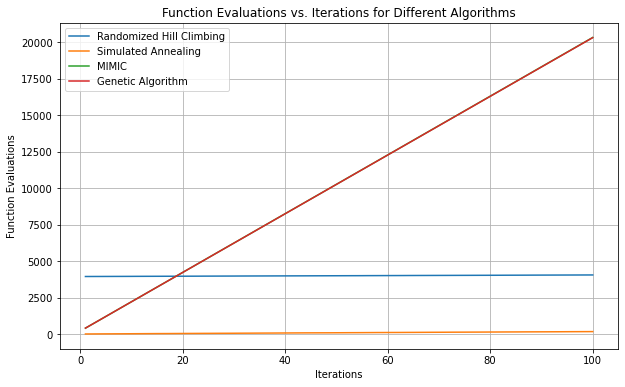

In [11]:
# initialize variables for fevals
function_evals_rhc = []
function_evals_sa = []
function_evals_mimic = []
function_evals_ga = []

# store fevals
function_evals_rhc = rhc_fitness_curve[:, 1]
function_evals_sa = sa_fitness_curve[:, 1]
function_evals_mimic = ga_fitness_curve[:, 1]
function_evals_ga = mimic_fitness_curve[:, 1]

# plot fevals vs iterations
iterations = np.arange(1, max_iters + 1)
plt.figure(figsize=(10,6))
plt.plot(iterations, function_evals_rhc, label='Randomized Hill Climbing')
plt.plot(iterations, function_evals_sa, label='Simulated Annealing')
plt.plot(iterations, function_evals_mimic, label='MIMIC')
plt.plot(iterations, function_evals_ga, label='Genetic Algorithm')

plt.xlabel('Iterations')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations vs. Iterations for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

Running experiments for problem size: 10
Running experiments for problem size: 50
Running experiments for problem size: 100


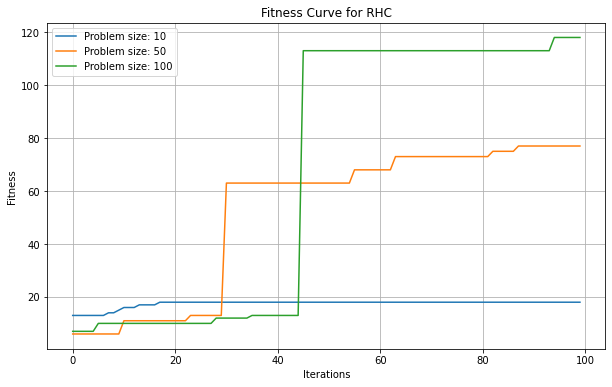

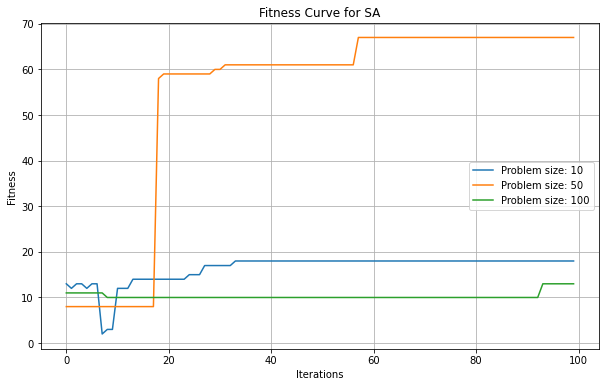

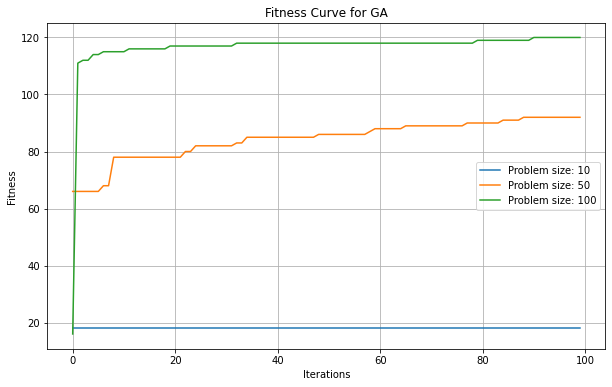

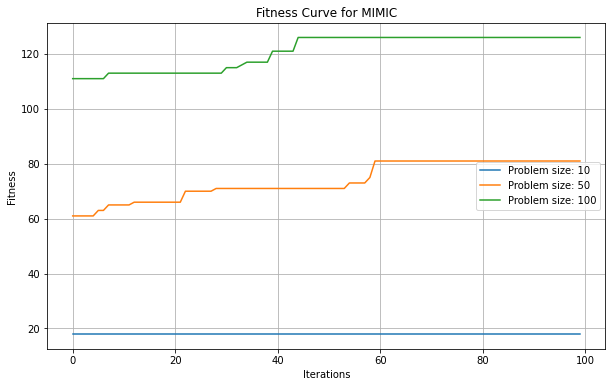

In [12]:

np.random.seed(0)

# Define a range of problem sizes (lengths)
problem_sizes = [10, 50, 100]

# Lists to store fitness curves for each algorithm and problem size
fitness_curves = {
    'rhc': [],
    'sa': [],
    'ga': [],
    'mimic': []
}

function_calls = {
    'rhc': [],
    'sa': [],
    'ga': [],
    'mimic': []
}

# Run experiments for each problem size
for length in problem_sizes:
    print("Running experiments for problem size: {}".format(length))
    
    # Define Fitness function and discrete problem object for the current problem size
    fitness = mlrose_hiive.ContinuousPeaks()
    problem = mlrose_hiive.DiscreteOpt(length=length, fitness_fn=fitness, maximize=True)

    # RHC
    rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                       max_attempts=max_attempts, 
                                                       max_iters=max_iters, 
                                                       curve=True, 
                                                       random_state=42,
                                                       restarts=75)[2]
    fitness_curves['rhc'].append(rhc_fitness_curve)
    function_calls['rhc'].append(len(rhc_fitness_curve))


    # SA
    sa_fitness_curve = mlrose_hiive.simulated_annealing(problem, 
                                                       max_attempts=max_attempts, 
                                                       max_iters=max_iters, 
                                                       curve=True, 
                                                       random_state=42,
                                                       schedule=mlrose_hiive.GeomDecay(init_temp=8, decay=0.8, min_temp=0.1))[2]
    fitness_curves['sa'].append(sa_fitness_curve)
    function_calls['sa'].append(len(sa_fitness_curve))

    # GA
    ga_fitness_curve = mlrose_hiive.genetic_alg(problem, 
                                                max_attempts=max_attempts, 
                                                max_iters=max_iters, 
                                                curve=True, 
                                                random_state=42,
                                                pop_size=200,
                                                mutation_prob=0.2)[2]
    fitness_curves['ga'].append(ga_fitness_curve)
    function_calls['ga'].append(len(ga_fitness_curve))

    # MIMIC
    mimic_fitness_curve = mlrose_hiive.mimic(problem, 
                                             max_attempts=100, 
                                             max_iters=100,  
                                             curve=True, 
                                             random_state=42,
                                             keep_pct=0.75)[2]
    fitness_curves['mimic'].append(mimic_fitness_curve)
    function_calls['mimic'].append(len(mimic_fitness_curve))

# Plot fitness curves for each algorithm and problem size
for algo, curves in fitness_curves.items():
    plt.figure(figsize=(10, 6))
    for i, curve in enumerate(curves):
        plt.plot(curve[:,0], label=f'Problem size: {problem_sizes[i]}')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title(f'Fitness Curve for {algo.upper()}')
    plt.legend()
    plt.grid(True)
    plt.show()

 

## One Max

In [13]:
print("Running Experiments for One Max Problem")
print()
np.random.seed(0)

# Define Fitness function and discrete problem object
fitness = mlrose_hiive.OneMax()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

max_attempts = 100
max_iters = 100

# RHC
print("Running Random Hill Climb Experiment")
start_time = time.time()
rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                                                     max_attempts = max_attempts, 
                                                                                     max_iters=max_iters, 
                                                                                     curve=True, 
                                                                                     random_state=42,
                                                                                    restarts=75)
end_time = time.time()
rhc_time = end_time - start_time
print("Time (s): {}".format(rhc_time))
print()

# SA
print("Running Simulated Annealing Experiment")
start_time = time.time()
sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    schedule=mlrose_hiive.GeomDecay(init_temp = 8, decay=0.8, min_temp=0.1))
end_time = time.time()
sa_time = end_time - start_time
print("Time (s): {}".format(sa_time))
print()

# GA
print("Running Genetic Algorithm Experiment")
start_time = time.time()
ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    pop_size=100,
                                                    mutation_prob=0.2)
end_time = time.time()
ga_time = end_time - start_time
print("Time (s): {}".format(ga_time))
print()

# MIMIC
print("Running MIMIC Algorithm Experiment")
start_time = time.time()
mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                            problem, 
                                                            max_attempts = 100, 
                                                            max_iters = 100,  
                                                            curve = True, 
                                                            random_state = 42,
                                                            keep_pct=0.25)
end_time = time.time()
mimic_time = end_time - start_time
print("Time (s): {}".format(mimic_time))
print()

Running Experiments for One Max Problem

Running Random Hill Climb Experiment
Time (s): 0.41758298873901367

Running Simulated Annealing Experiment
Time (s): 0.007995128631591797

Running Genetic Algorithm Experiment
Time (s): 1.6401088237762451

Running MIMIC Algorithm Experiment
Time (s): 1397.5844280719757



Text(0, 0.5, 'Fitness')

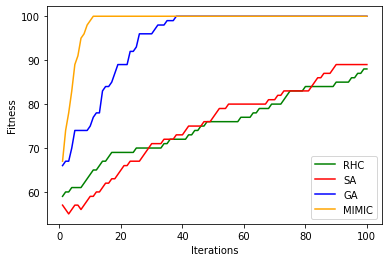

In [14]:
# Plot Iterations vs Fitness
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_fitness_curve[:, 0], label='RHC', color='green')
plt.plot(iterations, sa_fitness_curve[:, 0], label='SA', color='red')
plt.plot(iterations, ga_fitness_curve[:, 0], label='GA', color='blue')
plt.plot(iterations, mimic_fitness_curve[:, 0], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")


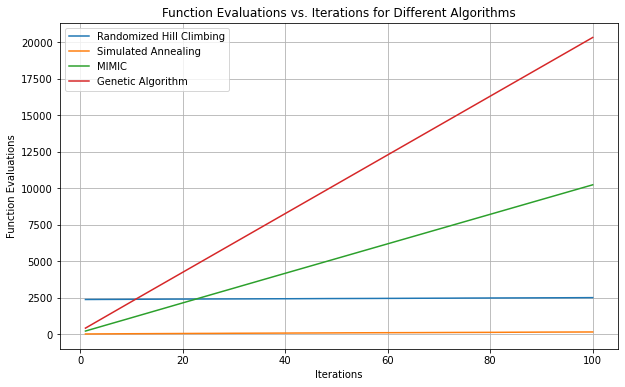

In [17]:
# initialize variables for fevals
function_evals_rhc = []
function_evals_sa = []
function_evals_mimic = []
function_evals_ga = []

# store fevals
function_evals_rhc = rhc_fitness_curve[:, 1]
function_evals_sa = sa_fitness_curve[:, 1]
function_evals_mimic = ga_fitness_curve[:, 1]
function_evals_ga = mimic_fitness_curve[:, 1]

# plot fevals vs iterations
iterations = np.arange(1, max_iters + 1)
plt.figure(figsize=(10,6))
plt.plot(iterations, function_evals_rhc, label='Randomized Hill Climbing')
plt.plot(iterations, function_evals_sa, label='Simulated Annealing')
plt.plot(iterations, function_evals_mimic, label='MIMIC')
plt.plot(iterations, function_evals_ga, label='Genetic Algorithm')

plt.xlabel('Iterations')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations vs. Iterations for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Plot Time Table
data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

time_OneMax = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
time_OneMax

,Algorithm,Time (s)
0,RHC,0.41758
1,SA,0.00800
2,GA,1.64011
3,MIMIC,1397.58443


Running experiments for problem size: 10
Running experiments for problem size: 50
Running experiments for problem size: 100


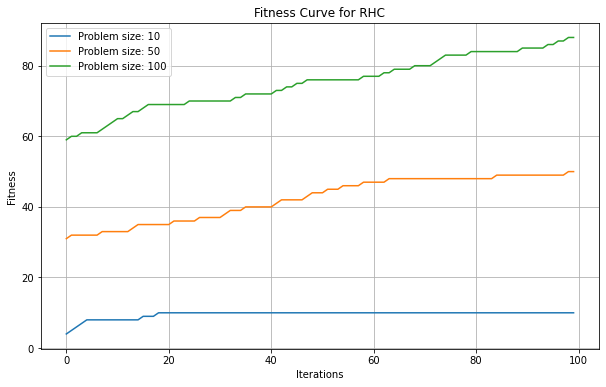

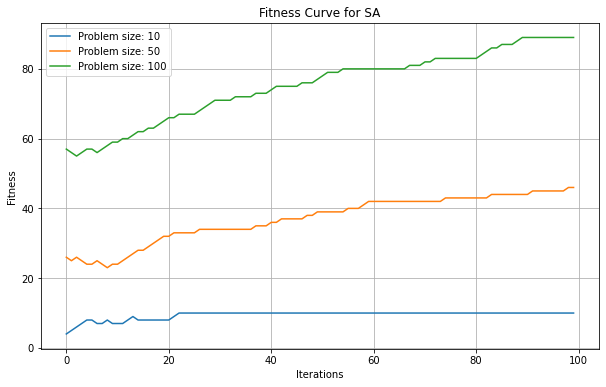

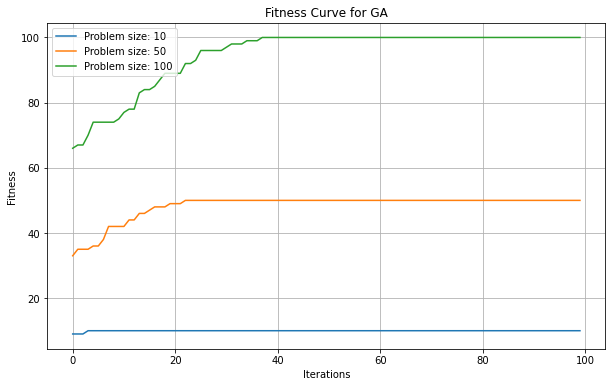

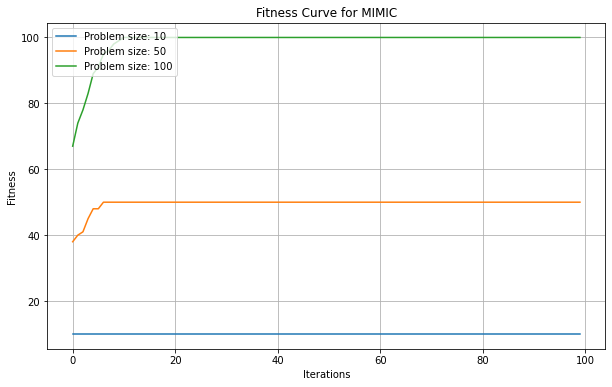

In [16]:
np.random.seed(0)


# Define a range of problem sizes (lengths)
problem_sizes = [10, 50, 100]

# Lists to store fitness curves for each algorithm and problem size
fitness_curves = {
    'rhc': [],
    'sa': [],
    'ga': [],
    'mimic': []
}

function_calls = {
    'rhc': [],
    'sa': [],
    'ga': [],
    'mimic': []
}

# Run experiments for each problem size
for length in problem_sizes:
    print("Running experiments for problem size: {}".format(length))
    
    # Define Fitness function and discrete problem object for the current problem size
    fitness = mlrose_hiive.OneMax()
    problem = mlrose_hiive.DiscreteOpt(length=length, fitness_fn=fitness, maximize=True)

    # RHC
    rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                       max_attempts=max_attempts, 
                                                       max_iters=max_iters, 
                                                       curve=True, 
                                                       random_state=42,
                                                       restarts=75)[2]
    fitness_curves['rhc'].append(rhc_fitness_curve)
    function_calls['rhc'].append(len(rhc_fitness_curve))


    # SA
    sa_fitness_curve = mlrose_hiive.simulated_annealing(problem, 
                                                       max_attempts=max_attempts, 
                                                       max_iters=max_iters, 
                                                       curve=True, 
                                                       random_state=42,
                                                       schedule=mlrose_hiive.GeomDecay(init_temp=8, decay=0.8, min_temp=0.1))[2]
    fitness_curves['sa'].append(sa_fitness_curve)
    function_calls['sa'].append(len(sa_fitness_curve))

    # GA
    ga_fitness_curve = mlrose_hiive.genetic_alg(problem, 
                                                max_attempts=max_attempts, 
                                                max_iters=max_iters, 
                                                curve=True, 
                                                random_state=42,
                                                pop_size=100,
                                                mutation_prob=0.2)[2]
    fitness_curves['ga'].append(ga_fitness_curve)
    function_calls['ga'].append(len(ga_fitness_curve))

    # MIMIC
    mimic_fitness_curve = mlrose_hiive.mimic(problem, 
                                             max_attempts=100, 
                                             max_iters=100,  
                                             curve=True, 
                                             random_state=42,
                                             keep_pct=0.25)[2]
    fitness_curves['mimic'].append(mimic_fitness_curve)
    function_calls['mimic'].append(len(mimic_fitness_curve))

# Plot fitness curves for each algorithm and problem size
for algo, curves in fitness_curves.items():
    plt.figure(figsize=(10, 6))
    for i, curve in enumerate(curves):
        plt.plot(curve[:,0], label=f'Problem size: {problem_sizes[i]}')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title(f'Fitness Curve for {algo.upper()}')
    plt.legend()
    plt.grid(True)
    plt.show()

 